# Análise exploratória



## Objetivo

O principal objetivo dessa análise é explorar e descobrir padrões, anomalias e relações entre variáveis antes de aplicar técnicas de modelagem mais avançadas. O conjunto de dados carrega informações sobre uma série de aplicativos disponíveis no Google Play Store

# Sobre os dados

Colunas do dataframe:

* App (nome dos aplicativos)
* Rating (nota no google play store)
* Size_Megabytes (tamanho do aplicativo)
* Installs	(número de vezes que foi baixado)
* Type	(se ele é pago ou gratuito)
* Price	(preço do app em dolares)
* Content Rating (classificação do conteúdo)
* Last Updated (Última vez que o app foi atualizado)
* Current Ver (versão mais recente do aplicativo)
* Android Ver (Compatibilidade com a versão do android)
* Genres_1 (Gênero do aplicativo)
* Genres_description (Subgênero do aplicativo)

# Perguntas motivadoras

* Como as variáveis se correlacionam?
* As avaliações são um critério relevante para um aplicativo ser instalado por usuários?
* Qual gênero de aplicativo mais popular?
* Qual faixa de preço os gêneros de aplicativos mais populares se encontram?

# Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data path

In [32]:
path = '../processed data/google_play_apps.csv'

# Data view

In [33]:
df = pd.read_csv(path)
df

,App,Rating,Size_Megabytes,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres_1,Genres_description
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,19.0,"10,000+",Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,No description
1,Coloring book moana,3.9,14.0,"500,000+",Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,8.7,"5,000,000+",Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,No description
3,Sketch - Draw & Paint,4.5,25.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,Art & Design,No description
4,Pixel Draw - Number Art Coloring Book,4.3,2.8,"100,000+",Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,FR Calculator,4.0,2.6,500+,Free,0.0,Everyone,"June 18, 2017",1.0.0,4.1 and up,Education,No description
8218,Sya9a Maroc - FR,4.5,53.0,"5,000+",Free,0.0,Everyone,"July 25, 2017",1.48,4.1 and up,Education,No description
8219,Fr. Mike Schmitz Audio Teachings,5.0,3.6,100+,Free,0.0,Everyone,"July 6, 2018",1.0,4.1 and up,Education,No description
8220,The SCP Foundation DB fr nn5n,4.5,Not informed,"1,000+",Free,0.0,Mature 17+,"January 19, 2015",Varies with device,Varies with device,Books,No description


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8222 entries, 0 to 8221
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 8222 non-null   object 
 1   Rating              8222 non-null   float64
 2   Size_Megabytes      8222 non-null   object 
 3   Installs            8222 non-null   object 
 4   Type                8222 non-null   object 
 5   Price               8222 non-null   float64
 6   Content Rating      8222 non-null   object 
 7   Last Updated        8222 non-null   object 
 8   Current Ver         8222 non-null   object 
 9   Android Ver         8222 non-null   object 
 10  Genres_1            8222 non-null   object 
 11  Genres_description  8222 non-null   object 
dtypes: float64(2), object(10)
memory usage: 770.9+ KB


In [35]:
df.describe()

,Rating,Price
count,8222.000000,8222.000000
mean,4.174751,0.320379
std,0.535773,1.926552
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,79.990000


# Respondendo a perguntas motivadoras

## Como as variáveis se relacionam

Aqui vamos tentar identificar correlações entre nossas variáveis

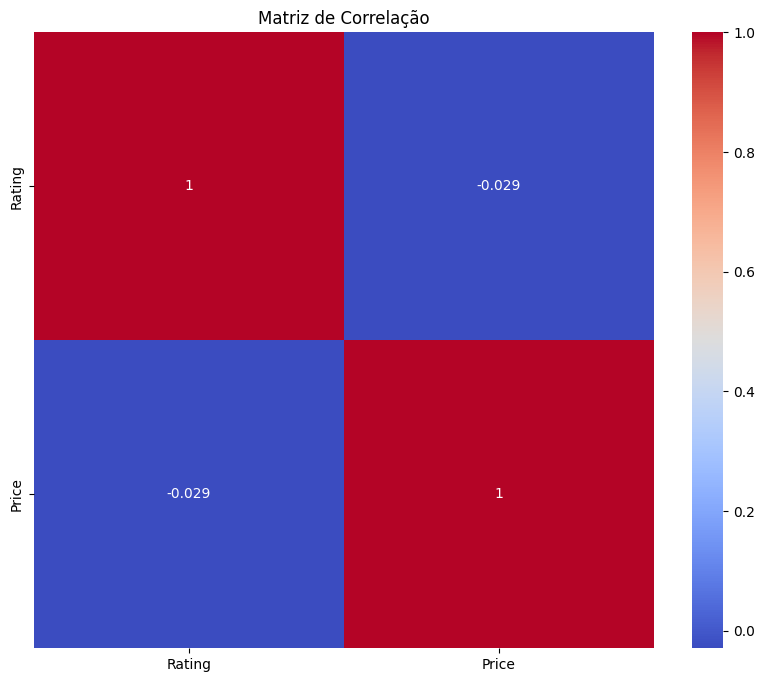

In [36]:
# Matriz de correlação
df_paid = df[df['Type']=='Paid']
plt.figure(figsize=(10, 8))
sns.heatmap(df_paid.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Notamos que a correlação entre preço e nota é muito pequena inversamente proporcional. Esse valor de correlação é tão pequeno que não é possível afimar que as notas possam ser usados como um critério para precificar um app

## As avaliações são um critério relevante para um aplicativo ser instalado por usuários?

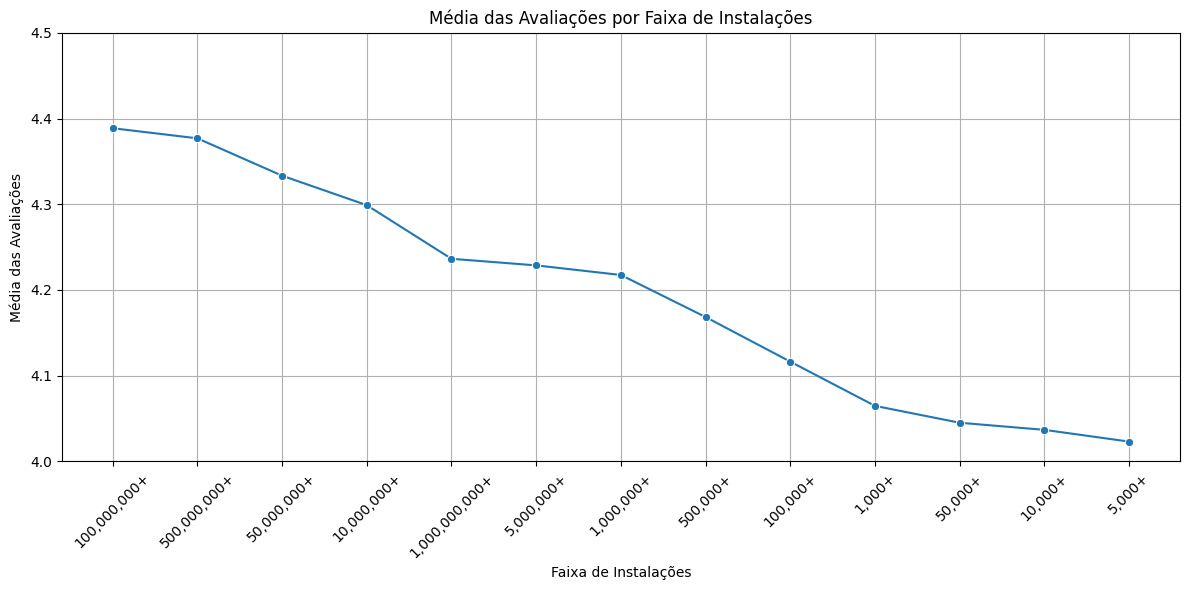

In [37]:
# Calcular a média das avaliações para cada faixa de instalação
rating_by_installs = df.groupby('Installs')['Rating'].mean().reset_index()

# Ordenar as faixas de instalação conforme a lista fornecida
valid_installs = ['100,000,000+', '500,000,000+','50,000,000+', '10,000,000+', '1,000,000,000+', '5,000,000+', '1,000,000+', '500,000+', '100,000+', '1,000+', '50,000+', '10,000+', '5,000+']
rating_by_installs['Installs'] = pd.Categorical(rating_by_installs['Installs'], categories=valid_installs)

# Gráfico de linha com preenchimento abaixo da linha e estilo 'steps-pre'
plt.figure(figsize=(12, 6))
sns.lineplot(data=rating_by_installs, x='Installs', y='Rating', marker='o')

plt.title('Média das Avaliações por Faixa de Instalações')
plt.xlabel('Faixa de Instalações')
plt.ylabel('Média das Avaliações')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(4, 4.5)  # Define o limite inferior do eixo Y como 4
plt.tight_layout()
plt.show()

Antes de começar a análise, é importante esclarecer que as menores faixas de downloads foram excluidas porque não considero que elas não possuem downlodas suficientes para serem analidas

Podemos perceber uma tendência de uma maior média de nota para maiores faixas de downloads. Poderíamos concluir que o "sucesso" de um aplicativo é determinado pela sua nota na plataforma, no entanto a variação entre as médias das faixas é muito pequena. O que pode indicar que embora as notas são um fator importante, mas não são o único fator que condiciona o "sucesso" do aplicativo

## Qual gênero de aplicativo é mais popular?

In [38]:
# Contar o total de aplicativos por faixa de download e ordenar de forma decrescente
apps_by_installs = df['Installs'].value_counts().reset_index()
apps_by_installs.columns = ['Installs', 'Total_Apps']
apps_by_installs = apps_by_installs.sort_values(by='Total_Apps', ascending=True)

# Gráfico de barras horizontais
fig1 = px.bar(apps_by_installs, 
              x='Total_Apps', 
              y='Installs', 
              orientation='h',
              title='Total de Aplicativos por Faixa de Download',
              labels={'Total_Apps': 'Total de Aplicativos', 'Installs': 'Faixa de Downloads'})

fig1.show()


# Contar o total de aplicativos por gênero
apps_by_genre = df['Genres_1'].value_counts().reset_index()
apps_by_genre.columns = ['Genre', 'Total_Apps']
apps_by_genre = apps_by_genre.sort_values(by='Total_Apps', ascending=True)

# Gráfico de barras verticais
fig2 = px.bar(apps_by_genre, 
              x='Total_Apps', 
              y='Genre', 
              title='Total de Aplicativos por Gênero',
              labels={'Genre': 'Gênero', 'Total_Apps': 'Total de Aplicativos'})

fig2.update_xaxes(tickangle=45)
fig2.show()


## Qual faixa de preço os aplicativos mais populares se encontram?

In [43]:
#Separando apenas os aplicativos pagos
df_paid = df[df['Type']=='Paid']
# Calcular a média de preços por gênero
media_precos_por_genero = df_paid.groupby('Genres_1')['Price'].mean().reset_index()

# Renomear as colunas para uma melhor apresentação
media_precos_por_genero.columns = ['Gênero', 'Média de Preço em dólar']

# Ordenar a tabela em ordem decrescente da média de preço, se necessário
media_precos_por_genero = media_precos_por_genero.sort_values(by='Média de Preço em dólar', ascending=False)

media_precos_por_genero

,Gênero,Média de Preço em dólar
4,Casino,14.000000
13,Medical,9.902698
3,Business,7.156667
5,Dating,6.323333
12,Lifestyle,6.224615
8,Finance,5.704286
6,Education,5.028958
24,Travel,4.956923
18,Photography,4.820667
16,Parenting,4.790000


A média de preços pode enganar porque diferente das notas, que variam de 1 a 5, a amplitude de preço é muito maior, podendo ir de 1 dolar até 79,99. Por essa razão o melhor a ser feito é construir um gráfico que represente a faixa de preços para cada gênero

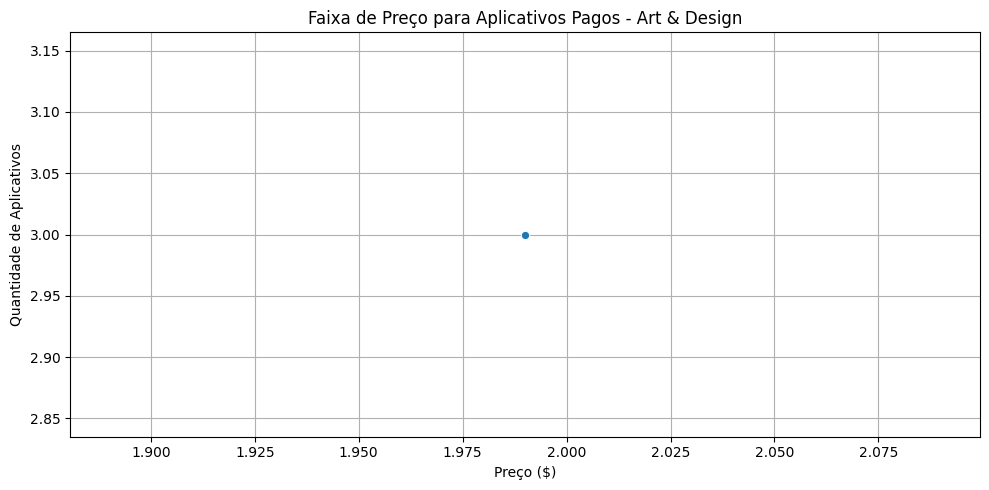

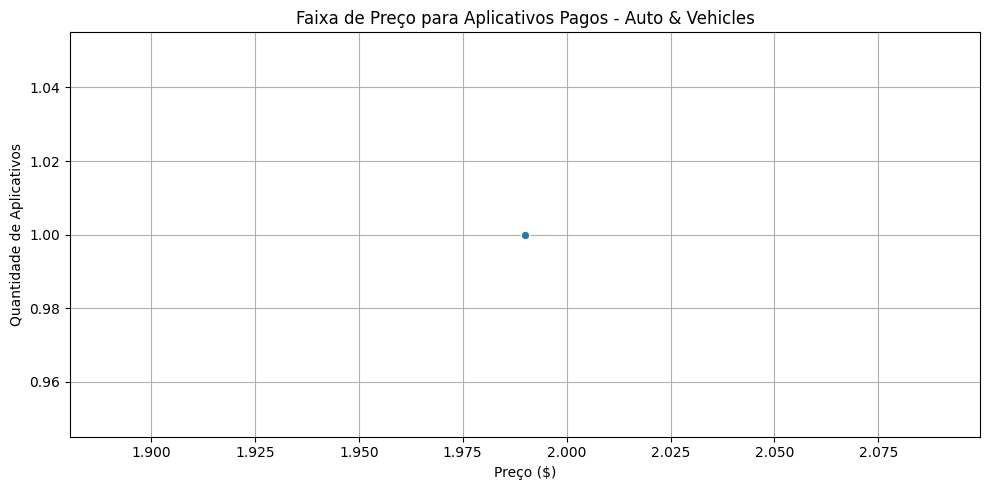

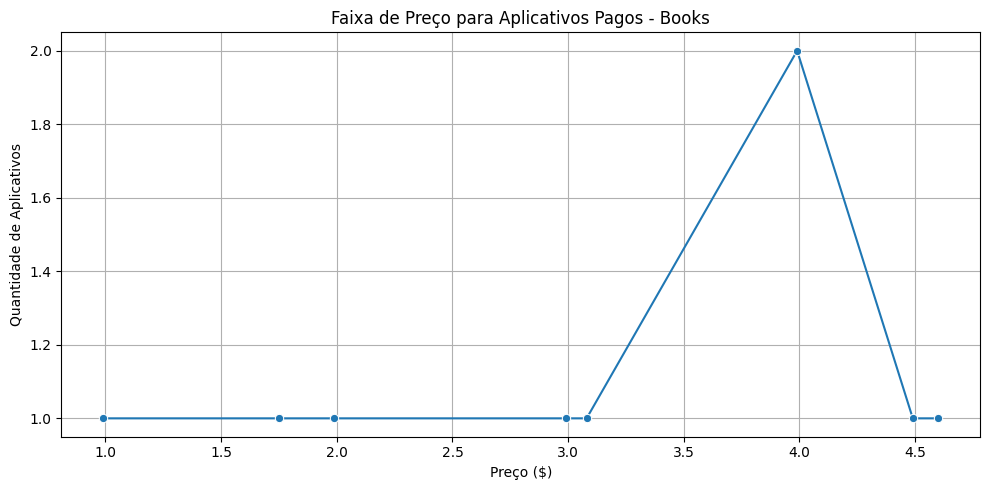

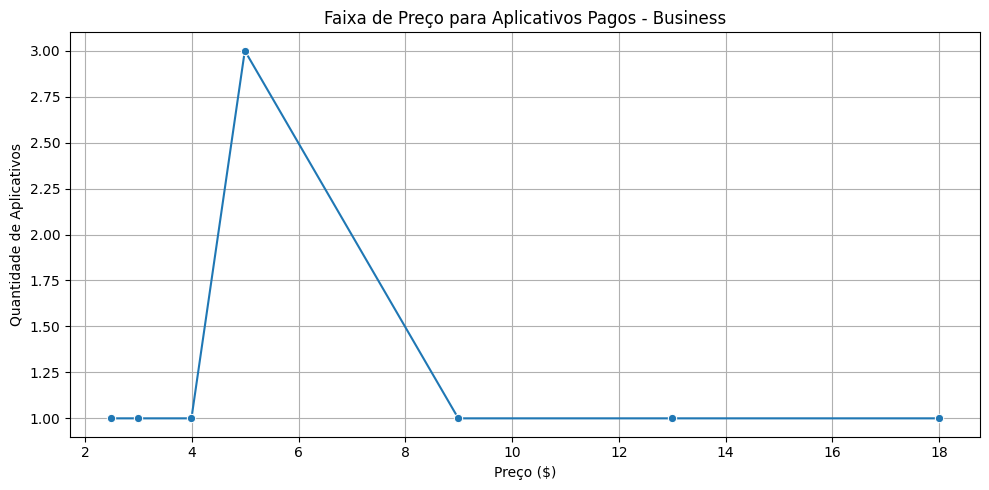

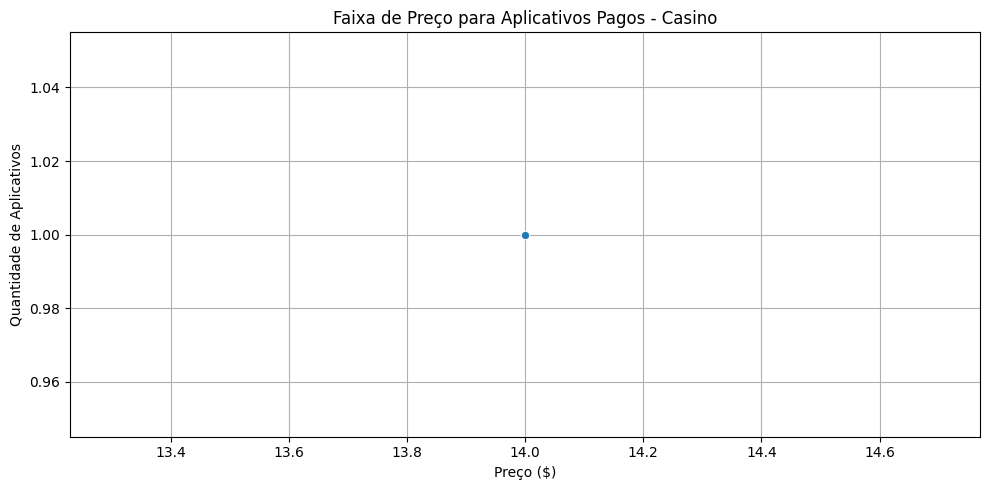

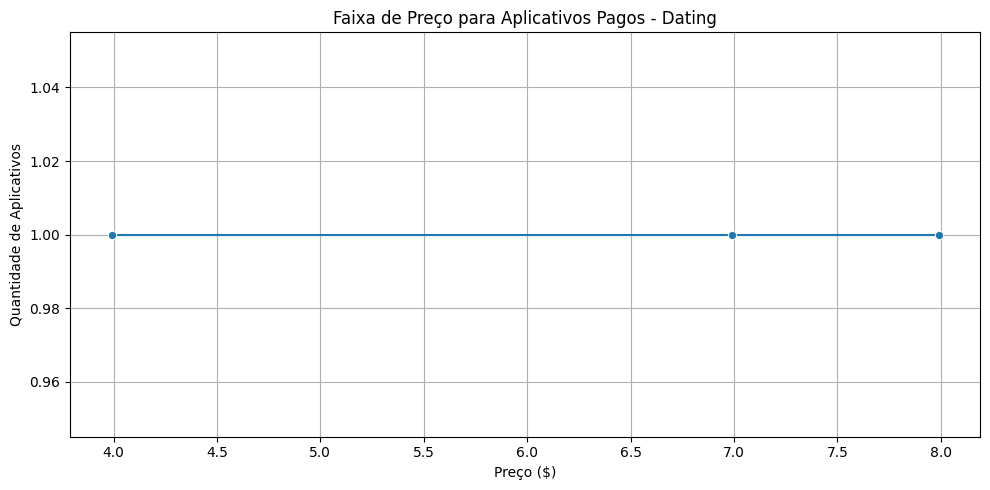

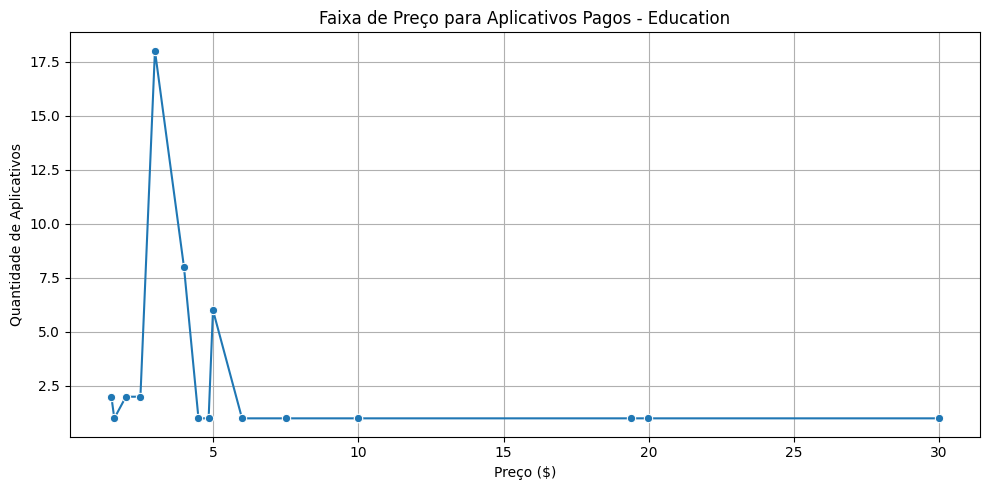

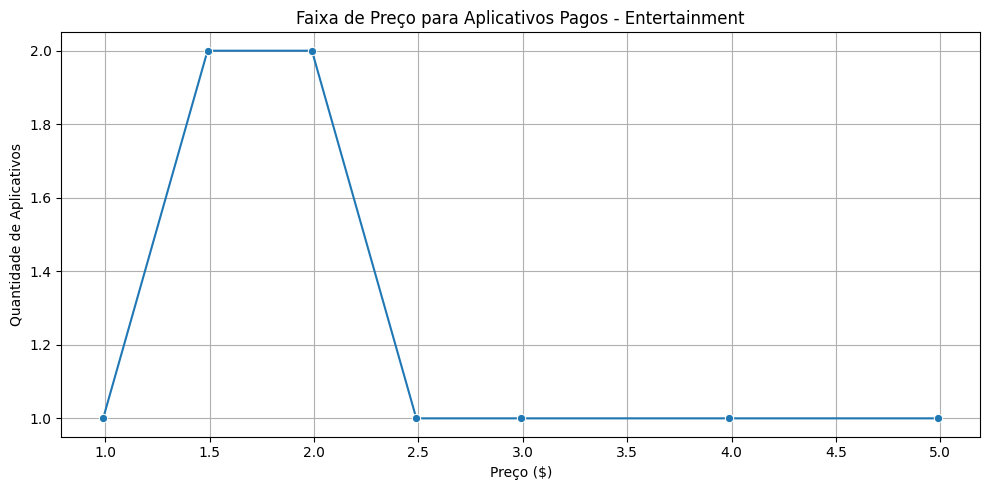

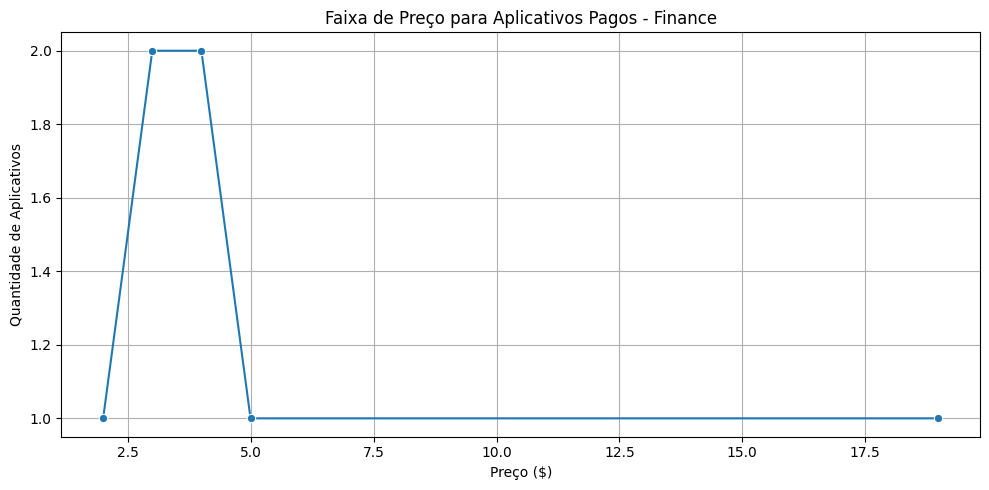

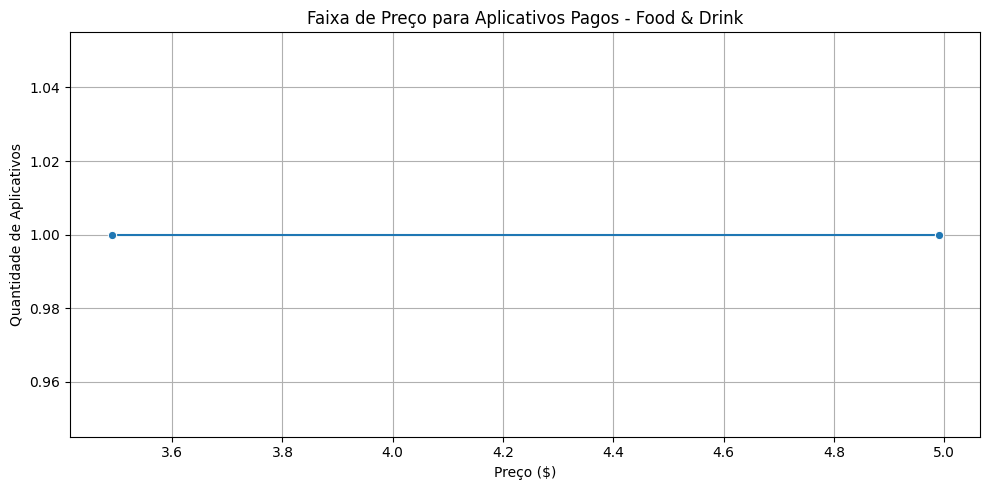

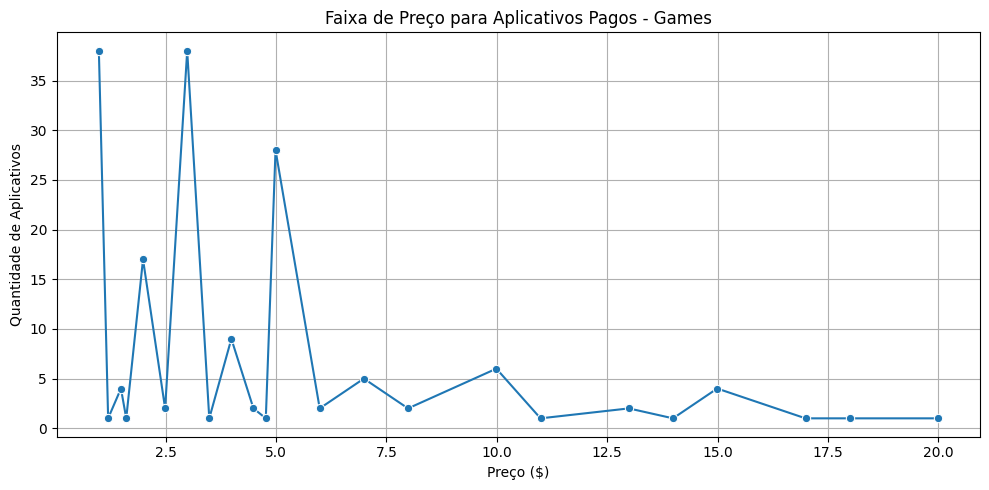

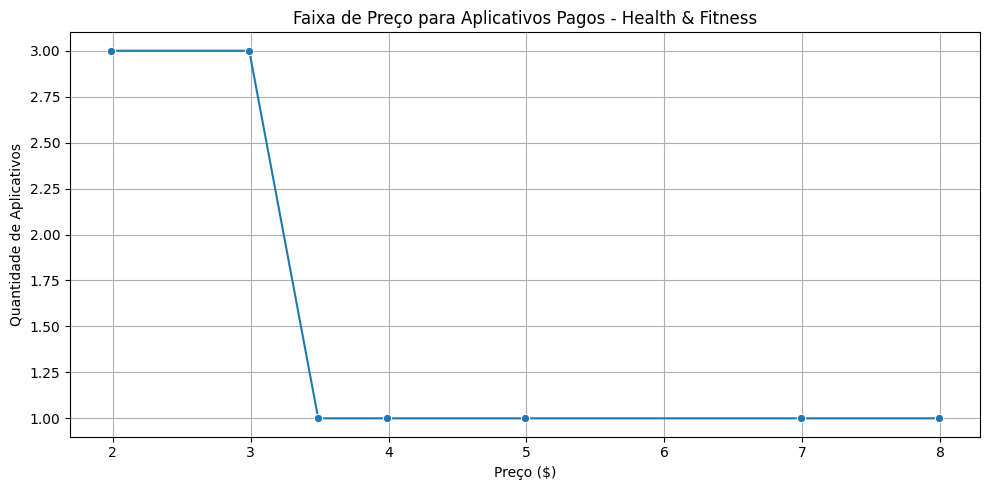

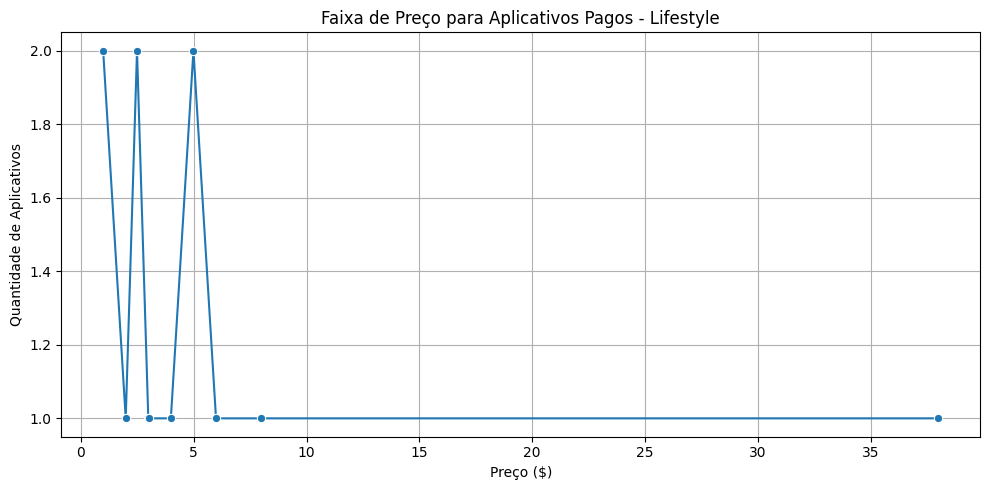

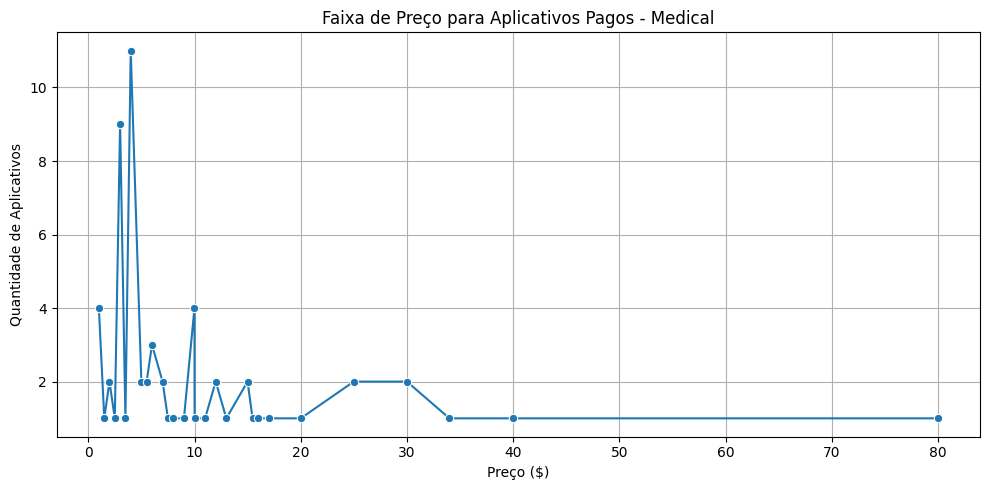

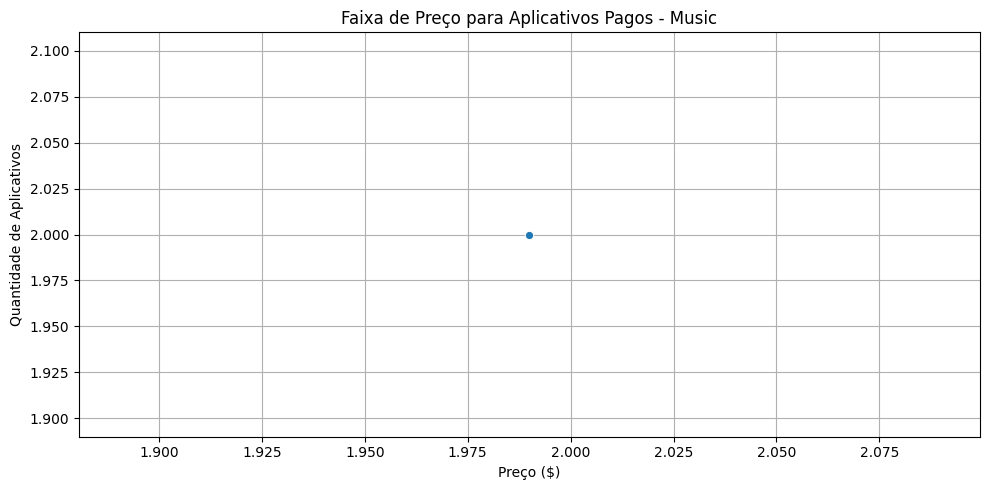

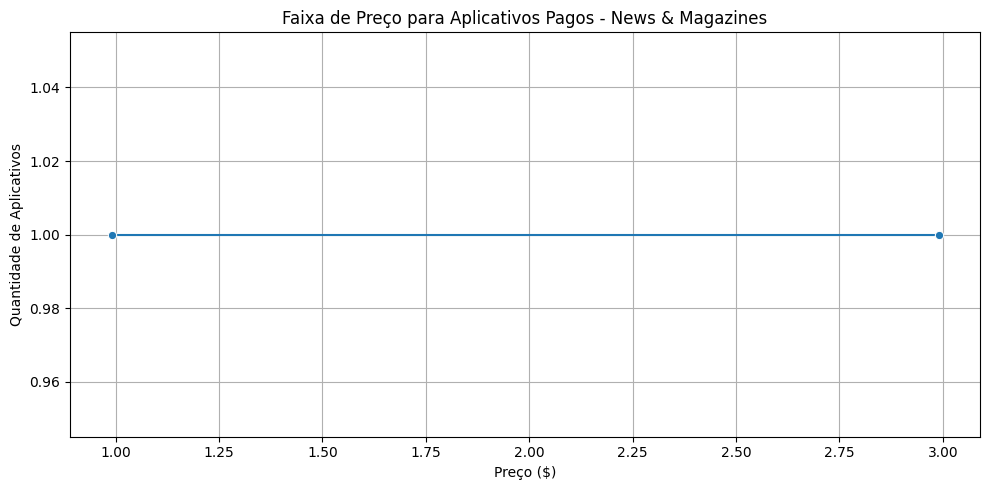

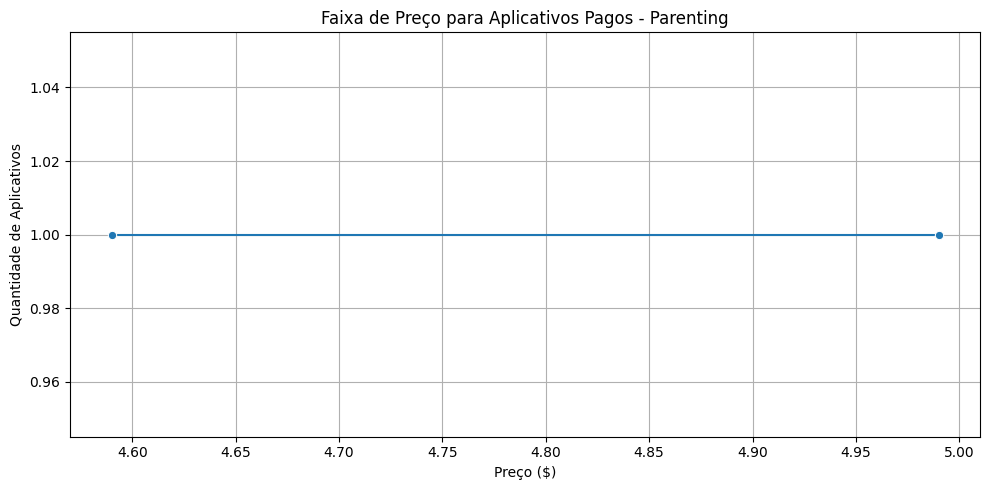

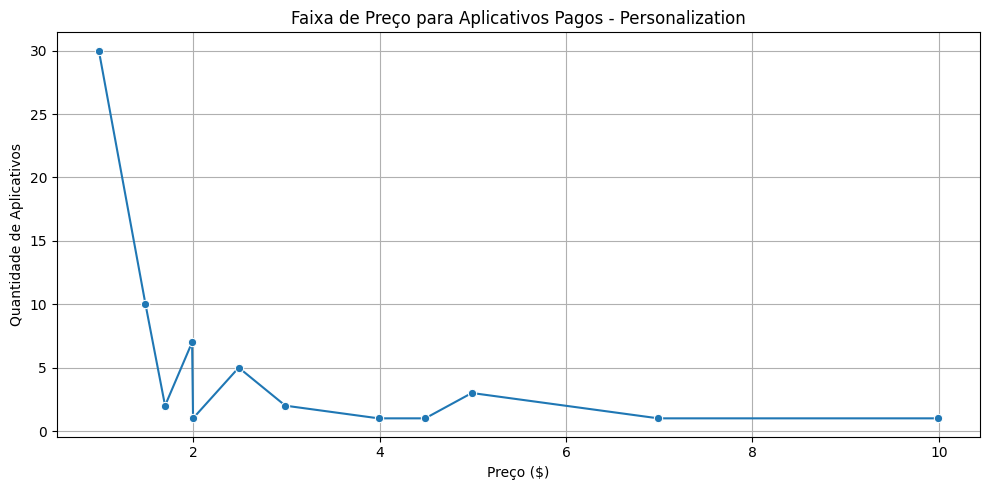

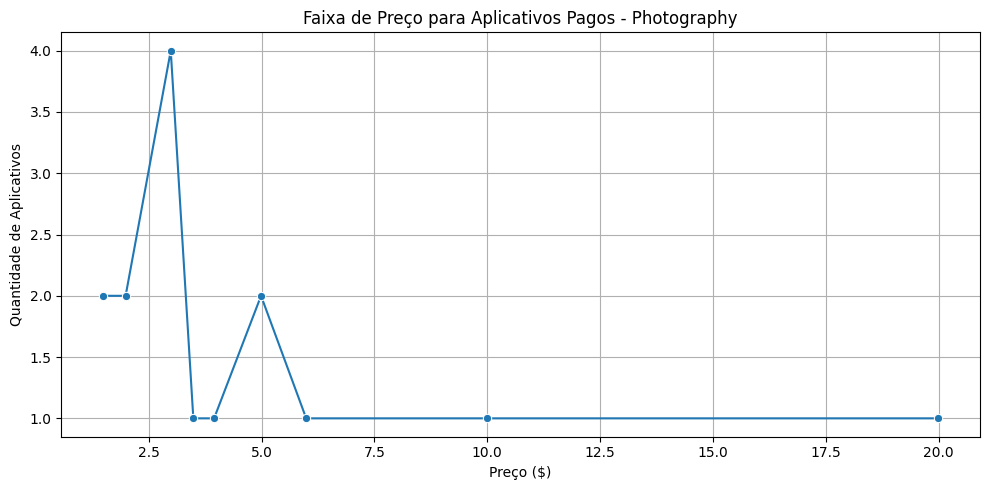

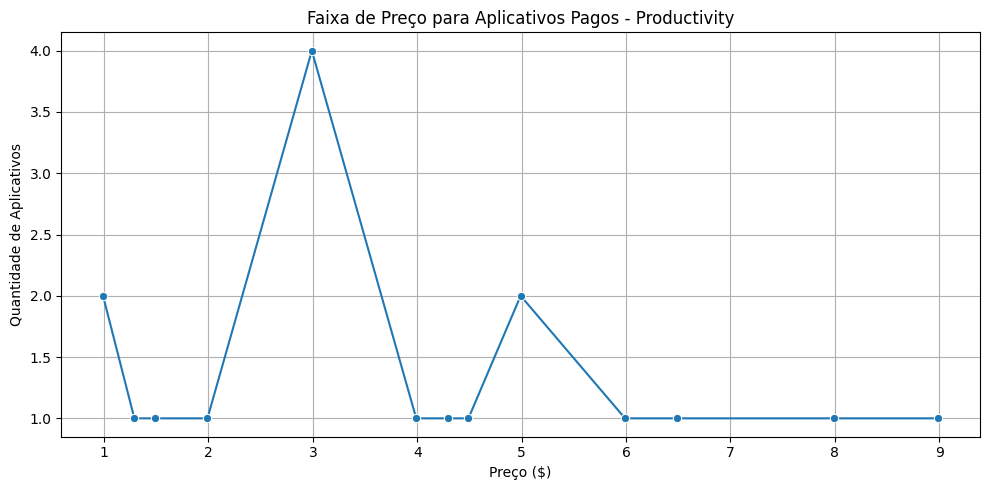

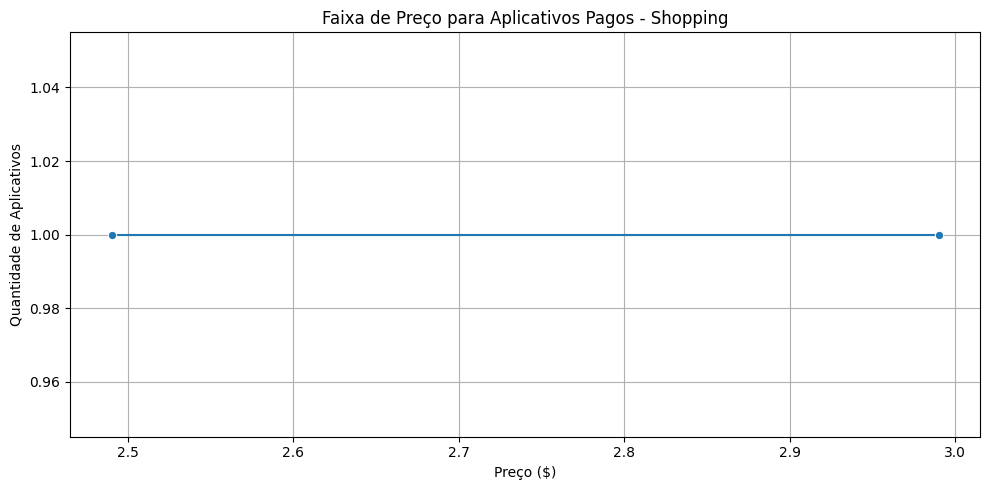

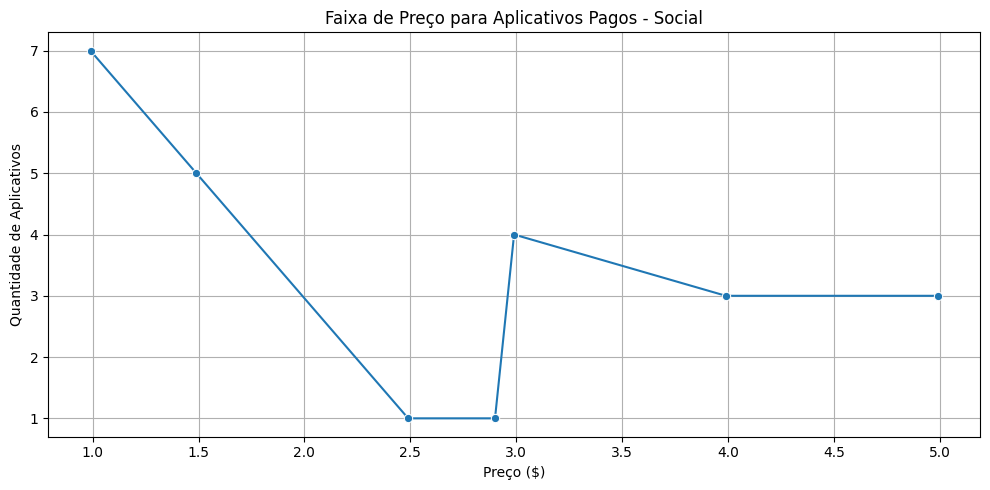

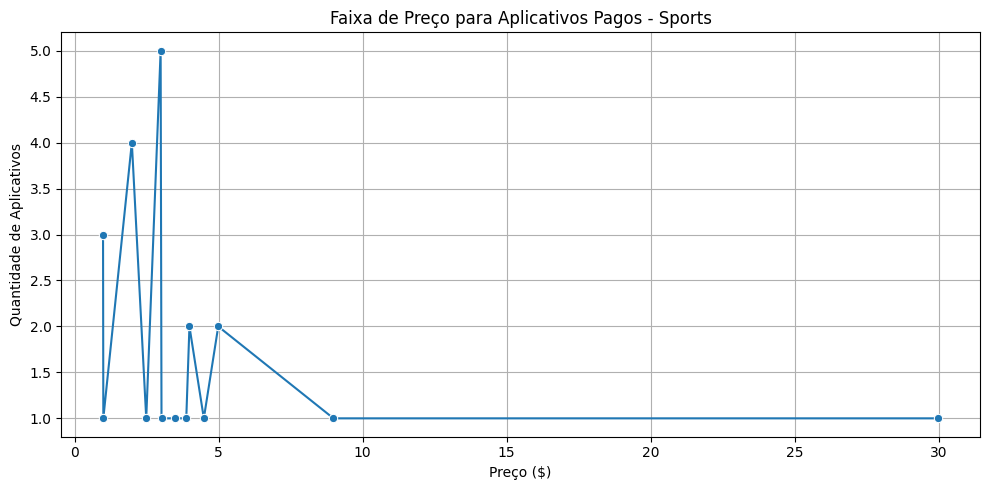

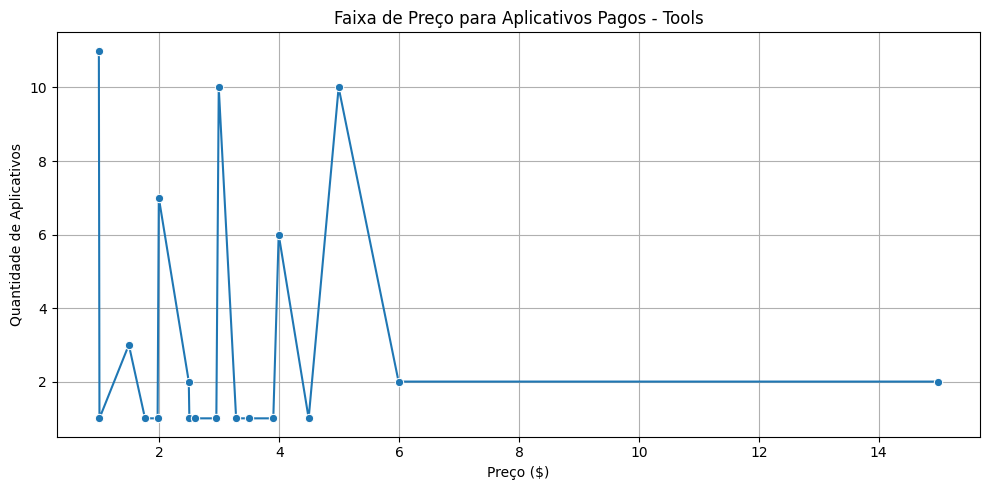

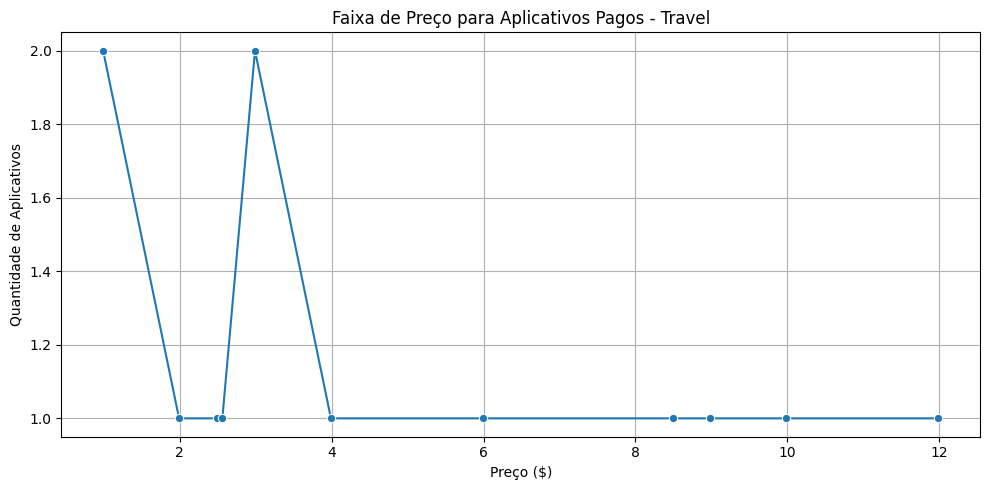

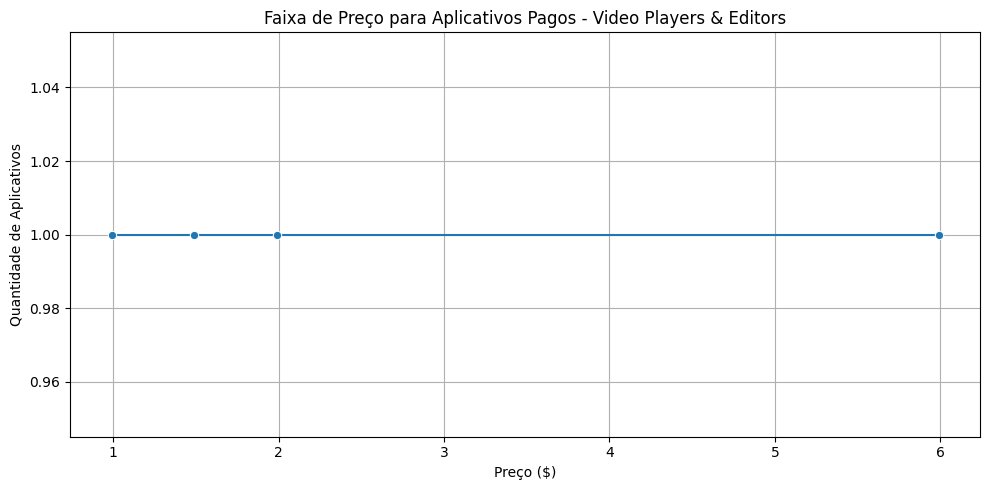

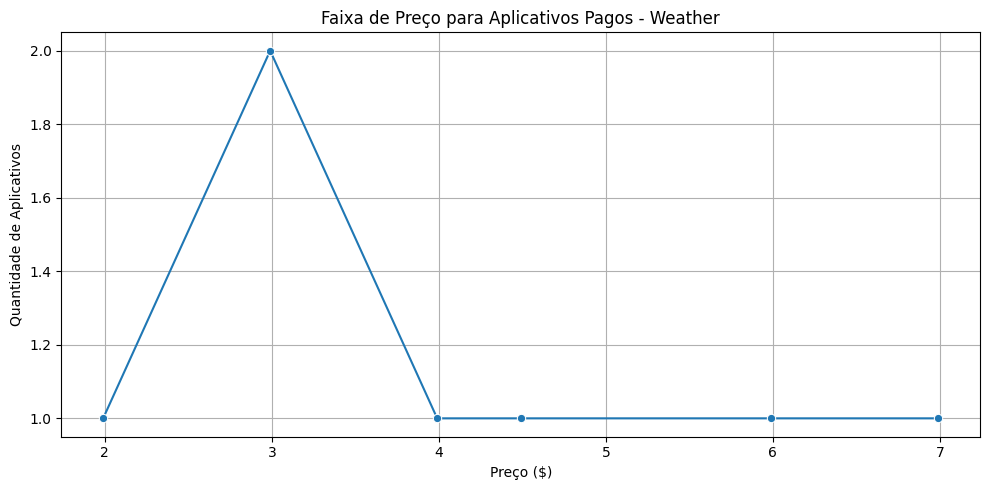

In [40]:
# Agrupar por Gênero e calcular a média dos preços para cada gênero
price_by_genre = df_paid.groupby(['Genres_1', 'Price']).size().reset_index(name='Count')

# Ordenar por gênero e preço
price_by_genre = price_by_genre.sort_values(by=['Genres_1', 'Price'])

# Obter lista de gêneros únicos
unique_genres = price_by_genre['Genres_1'].unique()

# Criar um gráfico para cada gênero
for genre in unique_genres:
    genre_data = price_by_genre[price_by_genre['Genres_1'] == genre]
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=genre_data, x='Price', y='Count', marker='o')
    
    plt.title(f'Faixa de Preço para Aplicativos Pagos - {genre}')
    plt.xlabel('Preço ($)')
    plt.ylabel('Quantidade de Aplicativos')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Os gráficos agora são capazes de mostrar uma perspectiva de faixa de preço de aplicativos por gênero

# Conclusão

Vamos responder as perguntas motivadoras

* Como as variáveis se correlacionam?

A correlação entre preço e notas é muito pequena o que significa que essas duas variáveis possuem baixa nfluencia uma a outra

* As avaliações são um critério relevante para um aplicativo ser instalado por usuários?

Há sim um comportamente que indica que maiores notas de aplicativos implicam em uma maior taxa de downloads, no entanto a diferença média das notas entre as faixas de downloads é muito pequena. Isso pode significar que as notas influenciam na popularidade do aplicativo, mas não são o único fator determinante.

* Qual gênero de aplicativo mais popular?

Os aplicativos da plataforma da google são majoritariamente de jogos com aproximadamente 20% dos aplicativos da plataforma pertencendo a esse gênero. Seguido de aplicativos educacionais e de redes sociais respectivamente.

* Qual faixa de preço os gêneros de aplicativos mais populares se encontram?

Games: 0-20

Tool: 0-6

Education: 0-10

Entertainment: 0-5

Social: 0-5

Travel: 0-12

Productivity: 0-9

Finance: 0-18

Lifestyle: 0-40

# Dashboard

Um dashboard que explora os insights desta análise pode ser acessado pelo Link abaixo

https://app.powerbi.com/view?r=eyJrIjoiOTRiMTY0ZjAtOGFiYS00OTg4LTk5YzItMmVlOWU5NTM2ZGI3IiwidCI6IjcyNjE3ZGQ4LTM3YTUtNDJhMi04YjIwLTU5ZDJkMGM1MDcwNyJ9